In [147]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import warnings

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=16,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
)

warnings.filterwarnings('ignore')

# Todo

## feature engineering
- 다른 노트북에서 feature missing 값 처리 차이 비교해보기
- tree류가 아닌 regressior에서 feature 공선성 문제 없는건가?
## Modeling
- 파라미터 튜닝
- 다양한 모델 써서 비교

# 참조
- 아웃라이어 제거
- target value => skew 체크. 있으면 수정 (log)
- skew 다른 해결방법 -> boxcox (이게 더 범용적. 람다값에 따라서 case 나눠져있음)
- test값도 비어있을 수 있다

In [216]:
train_org = pd.read_csv('./data/house_prices_advanced/train.csv')

In [217]:
train_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

test도 비어있을수 있다는 생각을 못 했군..

In [218]:
test_org = pd.read_csv('./data/house_prices_advanced/test.csv')
test_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [234]:
df = pd.concat([train_org, test_org],ignore_index=True)

In [220]:
df.nunique()

Id               2919
MSSubClass         16
MSZoning            5
LotFrontage       128
LotArea          1951
                 ... 
MoSold             12
YrSold              5
SaleType            9
SaleCondition       6
SalePrice         663
Length: 81, dtype: int64

In [48]:
nan_cols = df.isna().sum()
nan_cols[nan_cols > 0]

MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Electrical         1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu     1420
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
PoolQC          2909
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [49]:
df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [11]:
df[['SalePrice','Alley']].dropna().sort_values('SalePrice', ascending=False)

,SalePrice,Alley
747,265979,Pave
1328,256000,Grvl
297,239000,Pave
328,214500,Pave
1317,208900,Pave
...,...,...
620,67000,Grvl
1432,64500,Grvl
1380,58500,Grvl
1337,52500,Grvl


In [12]:
df[['SalePrice','PoolQC']].dropna().sort_values('SalePrice', ascending=False)

,SalePrice,PoolQC
1182,745000,Ex
1423,274970,Gd
1386,250000,Fa
197,235000,Ex
810,181000,Fa
1170,171000,Gd
1298,160000,Gd


# 전처리
null값 처리 :  
- 데이터를 다른 열을 통해 유추할 수 있으면 그 값을 넣고,
- 어떻게 알 수 없는 것들: category: 'unknown'처리 (ex. 퀄리티, 컨디션), 숫자: -1
- 단서 얻을 수 없고 너무 많이 null값을 가지고 있는 것들은 drop
- test.csv도 null값 있을 수 있다. 같이 처리

In [50]:
nan_cols[nan_cols > 0].index

Index(['MSZoning', 'LotFrontage', 'Alley', 'Utilities', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SalePrice'],
      dtype='object')

In [51]:
df[nan_cols[nan_cols > 0].index].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 35 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MSZoning      2915 non-null   object 
 1   LotFrontage   2433 non-null   float64
 2   Alley         198 non-null    object 
 3   Utilities     2917 non-null   object 
 4   Exterior1st   2918 non-null   object 
 5   Exterior2nd   2918 non-null   object 
 6   MasVnrType    2895 non-null   object 
 7   MasVnrArea    2896 non-null   float64
 8   BsmtQual      2838 non-null   object 
 9   BsmtCond      2837 non-null   object 
 10  BsmtExposure  2837 non-null   object 
 11  BsmtFinType1  2840 non-null   object 
 12  BsmtFinSF1    2918 non-null   float64
 13  BsmtFinType2  2839 non-null   object 
 14  BsmtFinSF2    2918 non-null   float64
 15  BsmtUnfSF     2918 non-null   float64
 16  TotalBsmtSF   2918 non-null   float64
 17  Electrical    2918 non-null   object 
 18  BsmtFullBath  2917 non-null 

값 1개씩 빈 값들 처리

In [240]:
nan_cols = df.isna().sum()
nan_cols[nan_cols > 0]


MSZoning           4
LotFrontage      486
Alley           2721
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
GarageType       157
GarageYrBlt      159
GarageFinish     159
GarageCars         1
GarageArea         1
GarageQual       159
GarageCond       159
Fence           2348
MiscFeature     2814
SaleType           1
SalePrice       1459
dtype: int64

In [236]:
# fireplace=0  -> fireplaceQU = NaN 이므로 NA로 바꿔줌
df[df['Fireplaces'] ==0][['Fireplaces','FireplaceQu']]  # 1420
df['FireplaceQu'] = df['FireplaceQu'].fillna('NA')

In [237]:
# PoolArea=0  -> PoolQC = NaN 이므로 NA로 바꿔줌
df[df['PoolArea'] == 0][['PoolArea','PoolQC']]
df[['PoolQC']] = df[['PoolQC']].fillna('NA')

In [238]:
# 1개임
df.groupby(['Electrical'])['Electrical'].count()#.drop_duplicates()
df['Electrical']= df['Electrical'].fillna('SBrkr')

In [241]:
# category 값들은 'unknown' 처리
for col in df[nan_cols[nan_cols > 0].index].select_dtypes('object'):
    df[col] = df[col].fillna('unknown')

In [242]:
# 값이 1개만 비어있는 것들 처리
df[df[nan_cols[nan_cols == 1].index].isnull().any(axis=1)][nan_cols[nan_cols == 1].index]


,Exterior1st,Exterior2nd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,KitchenQual,GarageCars,GarageArea,SaleType
2120,MetalSd,CBlock,NaN,NaN,NaN,NaN,TA,1.0,280.0,ConLD
2576,Wd Sdng,Plywood,548.0,0.0,311.0,859.0,Gd,NaN,NaN,WD


In [243]:
# 값이 2개 비어있는 것들 처리..
df[df[nan_cols[nan_cols == 2].index].isnull().any(axis=1)][nan_cols[nan_cols == 2].index]

,Utilities,BsmtFullBath,BsmtHalfBath,Functional
2120,AllPub,NaN,NaN,Typ
2188,AllPub,NaN,NaN,Typ


In [244]:
import re 
Bsmt_cols = [re.findall('.*Bsmt.*',col)[0] for col in df.columns if re.findall('.*Bsmt.*',col)]
#Bsmt_cols
df[df[nan_cols[nan_cols == 2].index].isnull().any(axis=1)][Bsmt_cols]

# bsmt 정보자체가 없는 애들이네. 
df[nan_cols[nan_cols == 2].index] = df[nan_cols[nan_cols == 2].index].fillna(-1)

In [245]:
# 이것도 다 unknown값 넣은 것. -1넣기
df[df[nan_cols[nan_cols == 23].index].isnull().any(axis=1)][['MasVnrType','MasVnrArea']]
df[nan_cols[nan_cols == 23].index] = df[nan_cols[nan_cols == 23].index].fillna(-1)

In [246]:
# 값이 1개만 비어있는 것들 처리
df[df[nan_cols[nan_cols == 1].index].isnull().any(axis=1)][nan_cols[nan_cols == 1].index]
df['Electrical'] = df['Electrical'].fillna('SBrkr')


In [247]:
# Garage 빈 값 처리
Garage_cols = [re.findall('.*Garage.*',col)[0] for col in df.columns if re.findall('.*Garage.*',col)]
df[df[nan_cols[nan_cols == 159].index].isnull().any(axis=1)][Garage_cols]
# 
df[nan_cols[nan_cols == 159].index] = df[nan_cols[nan_cols == 159].index].fillna(-1)

In [254]:
# 실수값 가지는 값 없는 것들 -1로 채워줌
nan_cols = df.isna().sum()
nan_cols[nan_cols > 0]

LotFrontage     486
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
GarageCars        1
GarageArea        1
SalePrice      1459
dtype: int64

In [256]:
df[nan_cols[nan_cols > 0].index] = df[nan_cols[nan_cols > 0].index].fillna(-1)
# 확인
nan_cols = df.isna().sum()
nan_cols[nan_cols > 0]

<AxesSubplot:xlabel='GarageCars', ylabel='GarageArea'>

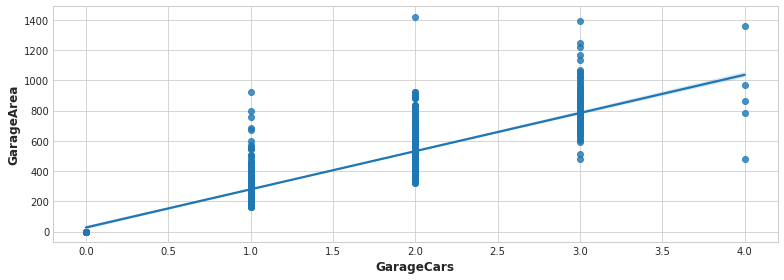

In [57]:
sns.regplot(x='GarageCars',y='GarageArea', data=train)

In [58]:
train.groupby(['GarageCars'])[['GarageArea']].describe()

GarageArea                                                      \
                count        mean         std    min    25%    50%    75%   
GarageCars                                                                  
0                81.0    0.000000    0.000000    0.0    0.0    0.0    0.0   
1               369.0  300.517615   87.804287  160.0  250.0  288.0  325.0   
2               824.0  519.797330   98.814314  320.0  450.0  506.0  576.0   
3               181.0  811.574586  126.800855  478.0  732.0  818.0  870.0   
4                 5.0  890.400000  317.510315  480.0  784.0  864.0  968.0   

                    
               max  
GarageCars          
0              0.0  
1            924.0  
2           1418.0  
3           1390.0  
4           1356.0

In [229]:
nan_cols[nan_cols == 1]

Exterior1st    1
Exterior2nd    1
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
Electrical     1
KitchenQual    1
GarageCars     1
GarageArea     1
SaleType       1
dtype: int64

In [18]:
df[df[['GarageArea']] > 0][['GarageArea']]#[['GarageCars','GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond']]

,GarageArea
0,548.0
1,460.0
2,608.0
3,642.0
4,836.0
...,...
1455,460.0
1456,500.0
1457,252.0
1458,240.0


In [19]:
df.groupby(['GarageCars'])[['GarageArea']].describe()

GarageArea                                                      \
                count        mean         std    min    25%    50%    75%   
GarageCars                                                                  
0                81.0    0.000000    0.000000    0.0    0.0    0.0    0.0   
1               369.0  300.517615   87.804287  160.0  250.0  288.0  325.0   
2               824.0  519.797330   98.814314  320.0  450.0  506.0  576.0   
3               181.0  811.574586  126.800855  478.0  732.0  818.0  870.0   
4                 5.0  890.400000  317.510315  480.0  784.0  864.0  968.0   

                    
               max  
GarageCars          
0              0.0  
1            924.0  
2           1418.0  
3           1390.0  
4           1356.0

In [20]:
# df[df[['GarageCars','GarageType', 'GarageYrBlt','GarageFinish', 'GarageQual', 'GarageCond']].isnull().any(axis=1)]
#df[['GarageQual', 'GarageCond']] = df[['GarageQual', 'GarageCond']].fillna({'GarageQual':'TA', 'GarageCond':'TA'})

In [230]:
df['YearBuilt'].sort_values()
df['GarageYrBlt'].sort_values()

1810      -1.0
1011      -1.0
1552      -1.0
148       -1.0
2691      -1.0
         ...  
1608    2010.0
1502    2010.0
378     2010.0
819     2010.0
2592    2207.0
Name: GarageYrBlt, Length: 2919, dtype: float64

In [23]:
diff = df['GarageYrBlt'] - df['YearBuilt']
diff[diff>0].sort_values(ascending=False).describe()

count    281.000000
mean      27.359431
std       27.430867
min        1.000000
25%        3.000000
50%       18.000000
75%       46.000000
max      123.000000
dtype: float64

In [24]:
# garage지어진 년도 = 집지어진년도로 맞춤
df.GarageYrBlt.fillna(df.YearBuilt, inplace=True)
#del df['Farheit']
#df.columns = 'File heat Observations'.split()

In [26]:
df[['MasVnrType', 'MasVnrArea']] = df[['MasVnrType', 'MasVnrArea']].fillna({'MasVnrType':'NA','MasVnrArea':0})

In [27]:
df['PoolArea'].describe()

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

단서 얻기 힘든 값이 너무 적은 컬럼은 삭제

In [186]:
# df = df.drop(labels=['MiscFeature','MiscVal','Fence','Alley','LotFrontage'], axis=1)
# df = df.drop(labels=['MiscVal'], axis=1)

나머지 퀄리티, 컨디션 등은 unknown으로 처리

In [33]:
df[nan_cols[nan_cols > 0].index] = df[nan_cols[nan_cols > 0].index].fillna('unknown')

In [249]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

categorical columns 체크.

In [252]:
df.select_dtypes('object').nunique().sort_values()

Street            2
CentralAir        2
PavedDrive        3
Alley             3
Utilities         3
LandSlope         3
LotShape          4
LandContour       4
ExterQual         4
GarageFinish      4
PoolQC            4
ExterCond         5
BsmtCond          5
Electrical        5
BsmtExposure      5
KitchenQual       5
MasVnrType        5
BsmtQual          5
BldgType          5
Fence             5
MiscFeature       5
LotConfig         5
HeatingQC         5
GarageQual        6
GarageCond        6
FireplaceQu       6
MSZoning          6
Foundation        6
RoofStyle         6
Heating           6
SaleCondition     6
BsmtFinType2      7
BsmtFinType1      7
GarageType        7
Functional        8
RoofMatl          8
HouseStyle        8
Condition2        8
Condition1        9
SaleType         10
Exterior1st      16
Exterior2nd      17
Neighborhood     25
dtype: int64

feet인 애들이 왜 object인고. float64로 수정

In [164]:
obj_clasees = df.select_dtypes('object').nunique()
obj_clasees[obj_clasees>30].index

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea'], dtype='object')

In [251]:
# object로 들어가있어서 unknown 들어간 애들 다시 숫자로
def func(x):
    x[x=='unknown'] = -1
    return x

df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','GarageArea']] = df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','GarageArea']].apply(func)
df[obj_clasees[obj_clasees>30].index] = df[obj_clasees[obj_clasees>30].index].astype('float64')

#train.info()

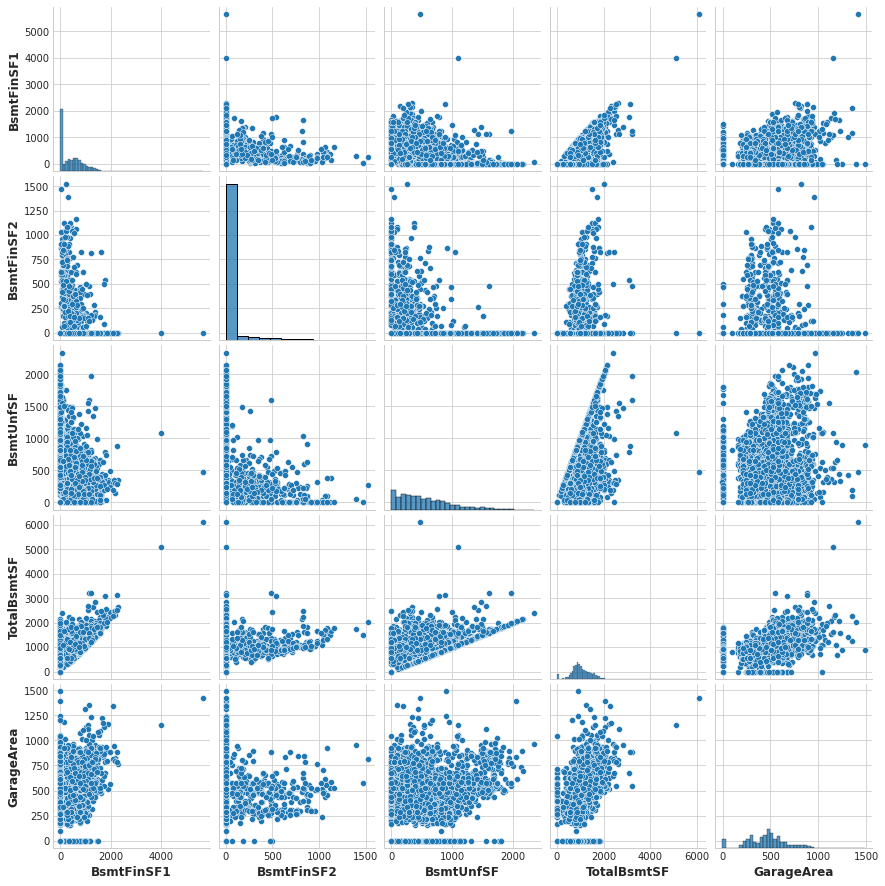

In [263]:
sns.pairplot(df[['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF','GarageArea']])

In [177]:
df[(df['BsmtFinSF1']>0) & (df['BsmtFinSF2']>0)][['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']]

,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
7,859.0,32.0,216.0,1107.0
24,188.0,668.0,204.0,1060.0
26,234.0,486.0,180.0,900.0
42,747.0,93.0,0.0,840.0
43,280.0,491.0,167.0,938.0
...,...,...,...,...
2843,595.0,400.0,0.0,995.0
2858,173.0,337.0,166.0,676.0
2862,475.0,297.0,142.0,914.0
2901,1136.0,116.0,129.0,1381.0


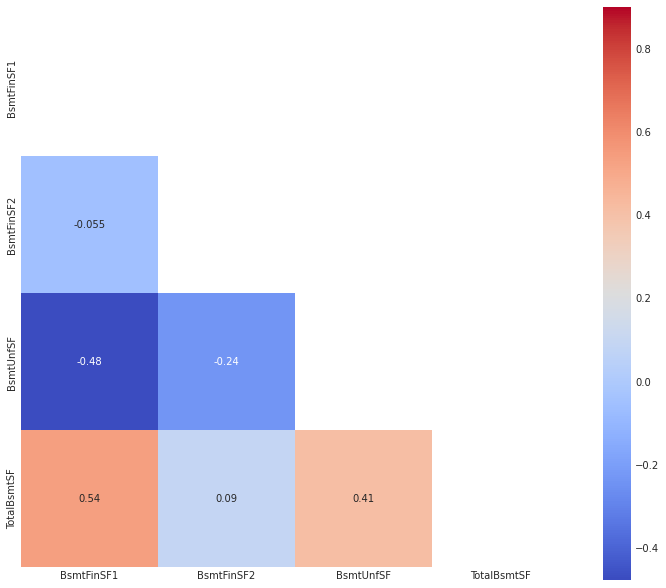

In [171]:

cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF']

#Correlation map to understand how other features relate to SalePrice
corrmat = df[cols].corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corrmat, mask=mask, ax=ax, annot=True, cbar_kws={"shrink": .82},vmax=.9, cmap='coolwarm', square=True)
#sns.pairplot(df[cols])


In [264]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2919 non-null   object 
 3   LotFrontage    2919 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          2919 non-null   object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2919 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [265]:
from scipy.stats import norm, skew
from scipy.special import boxcox1p, inv_boxcox1p

X = df.copy()
_ = X.pop('Id')

numeric_feats = X.dtypes[X.dtypes != "object"].index

#Check the skew of all numerical features
skewed_feats = X[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


,Skew
MiscVal,21.947195
PoolArea,16.898328
LotArea,12.822431
LowQualFinSF,12.088761
3SsnPorch,11.376065
KitchenAbvGr,4.302254
BsmtFinSF2,4.146141
EnclosedPorch,4.003891
ScreenPorch,3.946694
BsmtHalfBath,3.811651


-- coxbox 테스트 

In [213]:
train_org['SalePrice']

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [214]:
a=  boxcox1p(train_org['SalePrice'], lam)
inv_boxcox1p(a, lam)


0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [266]:
skewness = skewness[abs(skewness) > 0.75]
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    #df_concat[feat] += 1
    X[feat] = boxcox1p(X[feat], lam)

In [267]:

#y = X.pop('SalePrice')

for col in X.select_dtypes('object'):
    X[col], _ = X[col].factorize()


## train, test 분리

In [268]:
train = X.iloc[:1460]
test = X.iloc[1460:]
_ = test.pop('SalePrice')

In [123]:
# train = df.iloc[:1460]
# test = df.iloc[1460:]
# _ = test.pop('SalePrice')
#test.info()

# EDA

1. 가격과 거주지평수(의역) 관계

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

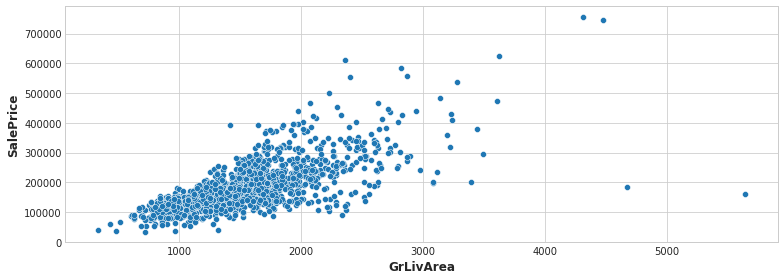

In [124]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=train)

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

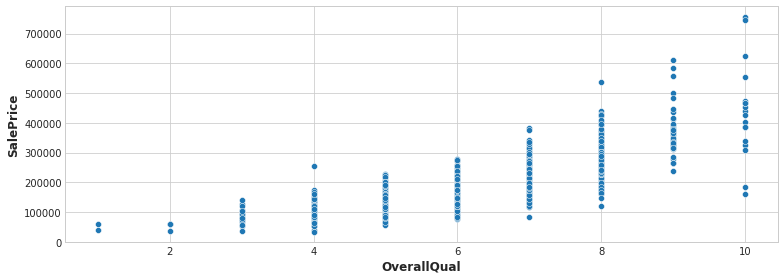

In [125]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=train)

# MI score 
- 참조해서 0.3 이상인 feature들의 산점도 확인

In [139]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [140]:
X = train.copy()
_ = X.pop('Id')
y = X.pop('SalePrice')

for col in X.select_dtypes('object'):
    X[col], _ = X[col].factorize()


discrete_features = X.dtypes == int

In [141]:
rst = make_mi_scores(X,y,discrete_features=discrete_features).sort_values(ascending=False)
rst[rst>0.3].sort_values(ascending=False)#.index

OverallQual     0.574733
Neighborhood    0.528805
GrLivArea       0.434242
YearBuilt       0.410787
LotArea         0.395994
TotalBsmtSF     0.367403
GarageCars      0.365834
GarageArea      0.362654
ExterQual       0.337086
BsmtQual        0.331371
KitchenQual     0.330035
Name: MI Scores, dtype: float64

In [143]:
rst[rst>=0.1].sort_values(ascending=False)#.index

OverallQual     0.574733
Neighborhood    0.528805
GrLivArea       0.434242
YearBuilt       0.410787
LotArea         0.395994
TotalBsmtSF     0.367403
GarageCars      0.365834
GarageArea      0.362654
ExterQual       0.337086
BsmtQual        0.331371
KitchenQual     0.330035
MSSubClass      0.285224
1stFlrSF        0.282894
YearRemodAdd    0.275914
GarageFinish    0.273040
FullBath        0.263524
GarageYrBlt     0.260174
FireplaceQu     0.222673
TotRmsAbvGrd    0.212734
GarageType      0.209302
Foundation      0.198833
OpenPorchSF     0.189949
Fireplaces      0.175998
2ndFlrSF        0.166292
HeatingQC       0.158463
Exterior2nd     0.155953
BsmtFinSF1      0.155077
BsmtFinType1    0.154508
MSZoning        0.132857
Exterior1st     0.131837
OverallCond     0.120105
BsmtUnfSF       0.119451
WoodDeckSF      0.106265
MasVnrType      0.103072
Name: MI Scores, dtype: float64

## corr heatmap

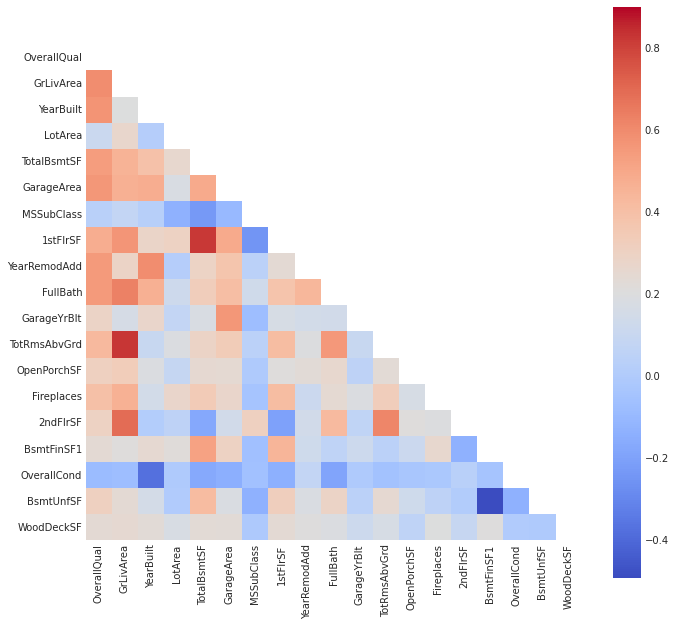

In [148]:

cols = rst[rst>=0.1].sort_values(ascending=False).index

#Correlation map to understand how other features relate to SalePrice
corrmat = train[cols].corr()
mask = np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(10, 10))
    sns.heatmap(corrmat, mask=mask, ax=ax, cbar_kws={"shrink": .82},vmax=.9, cmap='coolwarm', square=True)
#sns.pairplot(df[cols])


# 다중공선성 체크.. 
- 인데 categoriy 컬럼에도 의미가 없지않나

In [187]:
import numpy as np
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as ms

# dmatrices가 원하는 변수만을 matrix 형태로 만들어준 것
#y,X = dmatrices('Sale ~ AveRooms + AveBedrms', df, return_type='dataframe')
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['feature'] = X.columns
vif

,VIF,feature
0,14.949469,MSSubClass
1,1.628524,MSZoning
2,3.523090,LotArea
3,1.170226,Street
4,2.109673,LotShape
...,...,...
70,1.126156,MiscVal
71,6.827338,MoSold
72,39144.552645,YrSold
73,1.209449,SaleType


In [155]:
vif[vif['VIF'] >10].sort_values('VIF')

,VIF,feature
69,1.008205e+01,PoolQC
0,1.494947e+01,MSSubClass
59,1.777677e+01,GarageArea
46,2.909792e+01,FullBath
48,3.372140e+01,BedroomAbvGr
49,4.161223e+01,KitchenAbvGr
15,4.958726e+01,OverallCond
14,7.319832e+01,OverallQual
51,9.089079e+01,TotRmsAbvGrd
56,1.155447e+02,GarageYrBlt


# Model 

좀 더 조사해야할 것들:
- 파라미터 튜닝 관련
- 더 다양한 모델들

In [192]:
#Models
# from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, RobustScaler
from sklearn.linear_model import ElasticNet, Lasso,  BayesianRidge, LassoLarsIC
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error

import xgboost as xgb
import lightgbm as lgb

In [196]:
#Creating cross validation strategy with shuffle
n_folds = 5

def rmsle_cv(model,train,y):
    kf = KFold(n_folds, shuffle=True, random_state=0).get_n_splits(train.values)
    rmse= np.sqrt(-cross_val_score(model, train.values, y, scoring="neg_mean_squared_error", cv = kf))
    return(rmse)

In [194]:
model_lgb = lgb.LGBMRegressor(objective='regression',
                              num_leaves=5,
                              learning_rate=0.05, 
                              n_estimators=720,
                              max_bin = 55, 
                              bagging_fraction = 0.8,
                              bagging_freq = 5, 
                              feature_fraction = 0.2319,
                              feature_fraction_seed=9, 
                              bagging_seed=9,
                              min_data_in_leaf =6, 
                              min_sum_hessian_in_leaf = 11)

In [200]:
model_xgb = xgb.XGBRegressor(colsample_bytree=0.4603, 
                             gamma=0.0468, 
                             learning_rate=0.05, 
                             max_depth=3, 
                             min_child_weight=1.7817, 
                             n_estimators=2200,
                             reg_alpha=0.4640, 
                             reg_lambda=0.8571,
                             subsample=0.5213, 
                             silent=1,
                             random_state =0, 
                             nthread = -1)

In [269]:
X_train = train.copy()
y_train = X_train.pop('SalePrice')

In [270]:
score = rmsle_cv(model_lgb,X_train,y_train)
print(f'{score.mean()} std: {score.std()}')

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6

In [271]:
model_lgb.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8


LGBMRegressor(bagging_fraction=0.8, bagging_freq=5, bagging_seed=9,
              feature_fraction=0.2319, feature_fraction_seed=9,
              learning_rate=0.05, max_bin=55, min_data_in_leaf=6,
              min_sum_hessian_in_leaf=11, n_estimators=720, num_leaves=5,
              objective='regression')

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

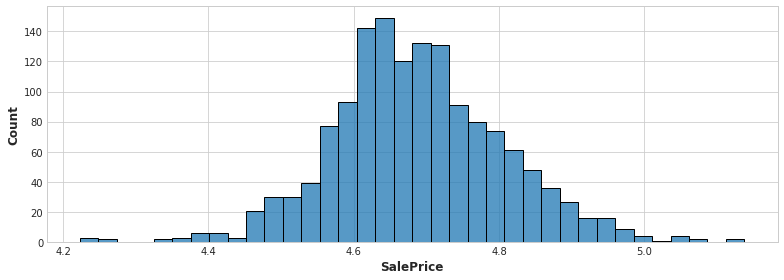

In [210]:
sns.histplot(df['SalePrice'])

In [273]:
inv_boxcox1p(y_train, lam)

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1455    175000.0
1456    210000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1460, dtype: float64

In [274]:
pred = model_lgb.predict(test)
pred = inv_boxcox1p(pred, lam)
pred

array([126576.12006094, 160609.98647269, 181400.16385761, ...,
       176747.62590846, 124343.86150518, 234008.6068317 ])

In [275]:
score = rmsle_cv(model_xgb,X_train,y_train)
print("Xgboost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[08:39:20] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:39:21] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[08:39:22] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting fl

In [277]:
model_xgb.fit(X_train,y_train)
pred = model_xgb.predict(test)
pred = inv_boxcox1p(pred, lam)


[08:45:11] WARNING: ../src/learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




In [286]:
sub = test_org[['Id']]
sub['SalePrice'] = pred
sub
sub.to_csv('./data/house_prices_advanced/sub_1.csv', index=False)